# **TIME SERIES FORECASTING**

# **Introduction**

### **Problem Statement:**
We have two datasets, alcohol_sales and miles_travelled. The columns "TRFVOLUSM227NFWA" and "S4248SM144NCEN"  appears to be an identifier, likely for a specific dataset or time series.



### **Aim of the notebook:**
Forecast future trends or values on historical data using time series model, ARIMA (Autoregressive Integrated Moving Average). Also evaluate the the model using RMSE (Root Mean Square Error) and MAE (Mean Absolute Error).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load alcohol_sales

In [ ]:
alcohol_sales = pd.read_csv("/content/Alcohol_Sales.csv")

In [ ]:
alcohol_sales

DATE  S4248SM144NCEN
0    01-01-1992            3459
1    01-02-1992            3458
2    01-03-1992            4002
3    01-04-1992            4564
4    01-05-1992            4221
..          ...             ...
320  01-09-2018           12396
321  01-10-2018           13914
322  01-11-2018           14174
323  01-12-2018           15504
324  01-01-2019           10718

[325 rows x 2 columns]

In [ ]:
alcohol_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [ ]:
alcohol_sales.head()

DATE  S4248SM144NCEN
0  01-01-1992            3459
1  01-02-1992            3458
2  01-03-1992            4002
3  01-04-1992            4564
4  01-05-1992            4221

In [ ]:
alcohol_sales.shape

(325, 2)

In [ ]:
alcohol_sales.describe()

S4248SM144NCEN
count      325.000000
mean      7886.400000
std       2914.269061
min       3031.000000
25%       5231.000000
50%       7481.000000
75%       9977.000000
max      15504.000000

## **Preprocessing**

In [ ]:
alcohol_sales.isnull().sum()

DATE              0
S4248SM144NCEN    0
dtype: int64

In [ ]:
alcohol_sales.duplicated().sum()

0

In [ ]:
#load miles_travelled

In [ ]:
miles_travelled= pd.read_csv("/content/Miles_Traveled.csv")

In [ ]:
miles_travelled

DATE  TRFVOLUSM227NFWA
0    01-01-1970             80173
1    01-02-1970             77442
2    01-03-1970             90223
3    01-04-1970             89956
4    01-05-1970             97972
..          ...               ...
583  01-08-2018            286608
584  01-09-2018            260595
585  01-10-2018            282174
586  01-11-2018            258590
587  01-12-2018            268413

[588 rows x 2 columns]

In [ ]:
miles_travelled.head()

DATE  TRFVOLUSM227NFWA
0  01-01-1970             80173
1  01-02-1970             77442
2  01-03-1970             90223
3  01-04-1970             89956
4  01-05-1970             97972

In [ ]:
miles_travelled.shape

(588, 2)

In [ ]:
miles_travelled.describe()

TRFVOLUSM227NFWA
count        588.000000
mean      190420.380952
std        57795.538934
min        77442.000000
25%       133579.000000
50%       196797.500000
75%       243211.500000
max       288145.000000

## **Preprocessing**

In [ ]:
miles_travelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DATE              588 non-null    object
 1   TRFVOLUSM227NFWA  588 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.3+ KB


In [ ]:
miles_travelled.isnull().sum()

DATE                0
TRFVOLUSM227NFWA    0
dtype: int64

In [ ]:
miles_travelled.duplicated().sum()

0

## **Exploratory Data Analysis**

In [ ]:
#univariate analysis

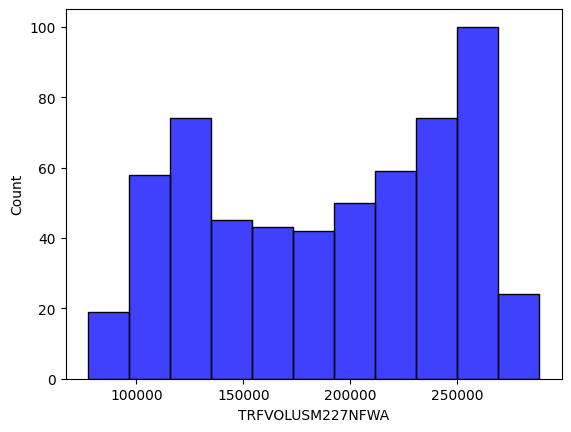

In [22]:
sns.histplot(x='S4248SM144NCEN', data=alcohol_sales, color= 'green')
plt.show()

sns.histplot(x='TRFVOLUSM227NFWA', data=miles_travelled, color= 'blue')
plt.show()


In [ ]:
#Bivariate analysis

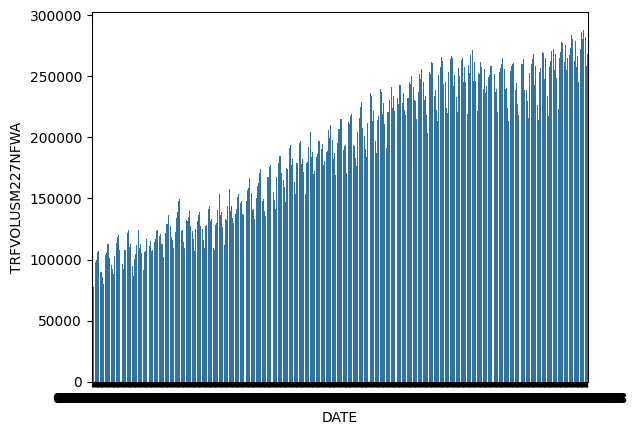

In [28]:
# Bivariate analysis of the 'status' column and 'funding_rounds' column
sns.barplot(x='DATE', y='S4248SM144NCEN', data=alcohol_sales)
plt.show()

# Bivariate analysis of the 'status' column and 'founded_at' column
sns.barplot(x='DATE', y='TRFVOLUSM227NFWA', data=miles_travelled)
plt.show()

In [ ]:
#Label Encoding

In [32]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

In [33]:
alcohol_sales['DATE'] = le.fit_transform(alcohol_sales['DATE'])

miles_travelled['DATE'] = le.fit_transform(miles_travelled['DATE'])

## **Feature Engineering**

In [34]:
#create correlation matrix
alcohol_sales.corr()

DATE  S4248SM144NCEN
DATE            1.000000        0.315038
S4248SM144NCEN  0.315038        1.000000

In [35]:
#create correlation matrix
miles_travelled.corr()

DATE  TRFVOLUSM227NFWA
DATE              1.000000          0.170529
TRFVOLUSM227NFWA  0.170529          1.000000

In [36]:
# Plotting Correlation Matrix Heatmap
correlation_matrix = alcohol_sales.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Normalization

In [37]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(alcohol_sales)

In [38]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(miles_travelled)

# **Modeling**

In [ ]:
# ARIMA MODEL for time series forecasting

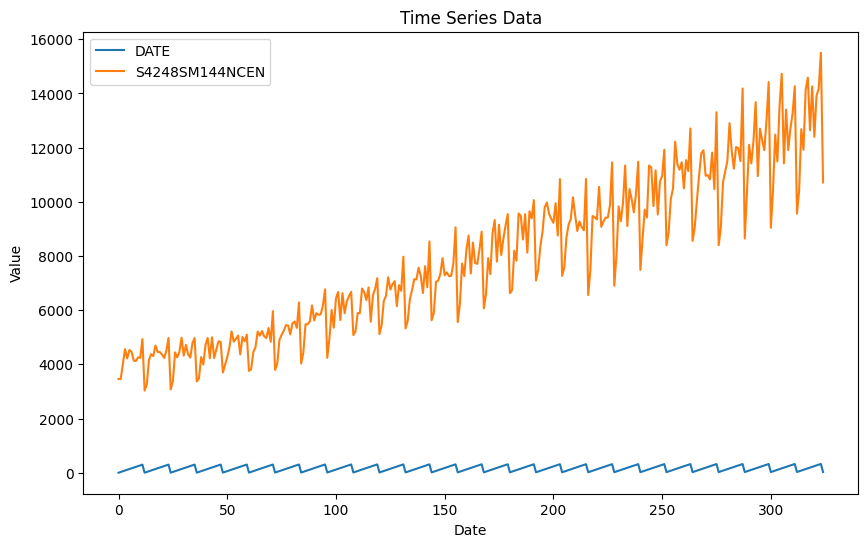

In [40]:
# Plot the data
alcohol_sales.plot(figsize=(10, 6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(train, order=(1, 1, 1))  # Adjust the order as needed
arima_result = arima_model.fit()

# Forecast
arima_forecast = arima_result.forecast(steps=len(test))

In [45]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Ensure 'DATE' is the index and it's a datetime index
alcohol_sales['DATE'] = pd.to_datetime(alcohol_sales['DATE'])
alcohol_sales.set_index('DATE', inplace=True)

In [47]:
# Extract the target series
series = alcohol_sales['S4248SM144NCEN']

In [48]:
# Train-test split
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

In [49]:
# Fit the ARIMA model
order = (1, 1, 1)  # Adjust the order based on model selection criteria like AIC/BIC
arima_model = ARIMA(train, order=order)
arima_result = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [50]:
# Forecast
forecast = arima_result.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [53]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print('ARIMA RMSE:', rmse)
print('ARIMA MAE:', mae)

ARIMA RMSE: 2001.0286107681188
ARIMA MAE: 1623.3984782672915


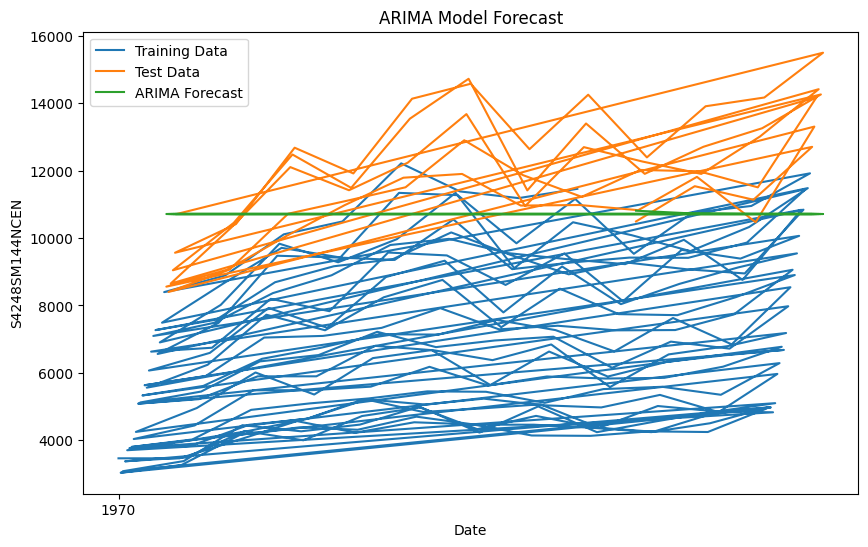

In [54]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('S4248SM144NCEN')
plt.show()